<a href="https://colab.research.google.com/github/samuelbahia/Report/blob/master/An%C3%A1lise_de_Clusteriza%C3%A7%C3%A3o_com_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabalho Prático: Análise de Clusterização com K-Means


Objetivo:


O objetivo deste trabalho é explorar e aprimorar o processo de clusterização com o algoritmo K-Means aplicado a um conjunto de dados com 1000 pessoas e 5 características. O aluno deverá propor novas colunas de análise baseadas na clusterização e implementar melhorias na interpretação dos clusters. Após a implementação, o aluno deverá tirar conclusões a partir dos resultados obtidos.

Instruções:

Etapa 1: Preparação do Ambiente
Configure o ambiente no Google Colab para executar PySpark.
Importe as bibliotecas necessárias e crie um dataset sintético de 1000 pessoas com 5 colunas extras (mantenha as colunas idade, renda, educacao, dependentes e experiencia).

Etapa 2: Clusterização com K-Means
Utilize o algoritmo K-Means para clusterizar os dados.
Permita que o usuário defina o número de clusters.
Armazene os resultados da clusterização em um DataFrame chamado clusters.

Etapa 3: Análise Final
Visualize resultados com clusters de tamanho: 5.
Conclusões:

Com base nas melhorias implementadas e nos dados resultantes, responda às seguintes perguntas:

Qual cluster possui a maior média de renda? E o menor?

Com base no tamanho dos clusters, qual parece ser o mais representativo do conjunto de dados?

Entrega:

Um arquivo com o link do código implementado no Google Colab (Compartilhado) comentado na pasta "Entrega dos Trabalhos" no TEAMs até o dia 23/10/2024.
Critérios de Avaliação:

Correção na implementação do código.
Clareza e profundidade nas conclusões tiradas a partir dos resultados obtidos.
Dúvidas pelo e-mail: sergio.assuncao.monteiro@gmail.com

Integrantes do Grupo:
Matrícula: Nome:
202311173135 Carlos Henrique da Silva Thees
202311135705 Claudia Pessoa Lorenzoni
202311135977 Karina Fernandes Mangabeira
202312007034 Renata Sales de Abreu
202311136256 Samuel das Graças Bahia

Projeto Aplicado - Data Architecture & Analysis (IBM2938)

Professor Sérigio Monteiro

IBMEC MBA BI DATA SCIENCE - Outubro de 2024

Digite o número de clusters desejado: 5


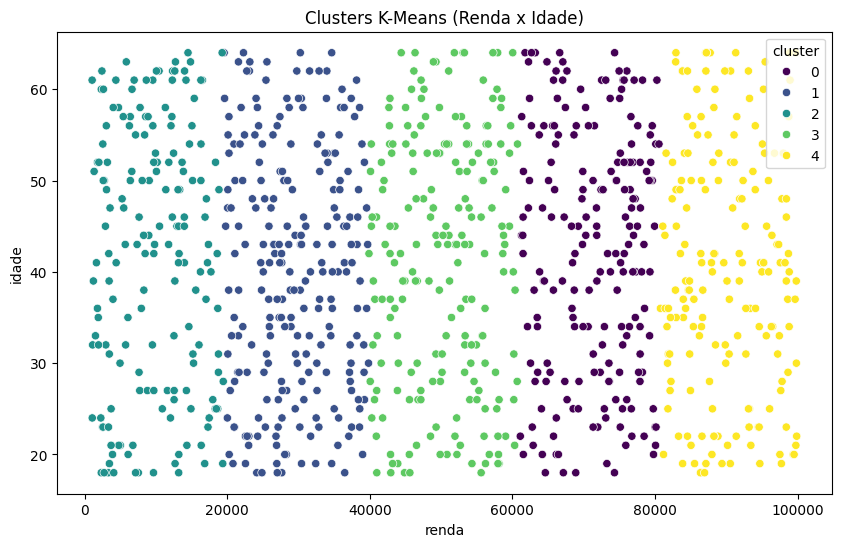


Média de renda por cluster:
 cluster
0    71347.000000
1    29433.965957
2     9730.618497
3    50336.066986
4    89967.972973
Name: renda, dtype: float64

Cluster com maior média de renda: 4
Cluster com menor média de renda: 2
Digite o número de clusters desejado: 5


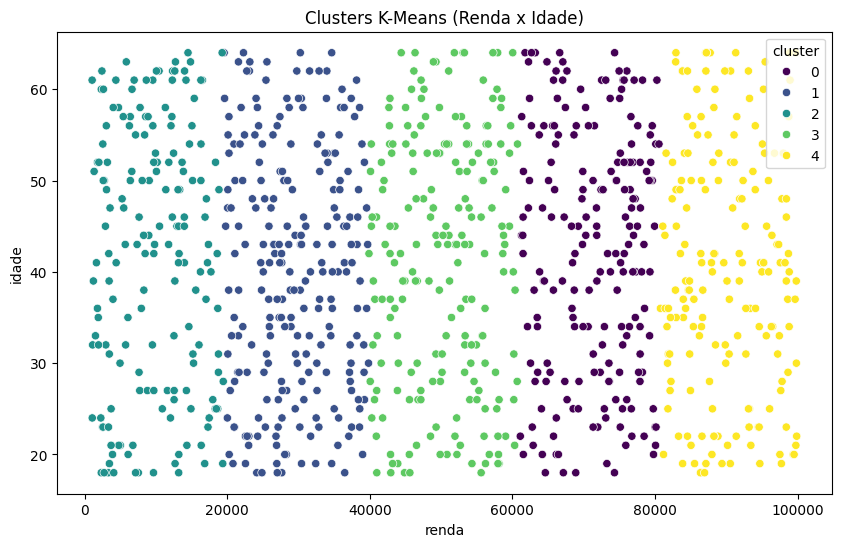


Média de renda por cluster:
 cluster
0    71347.000000
1    29433.965957
2     9730.618497
3    50336.066986
4    89967.972973
Name: renda, dtype: float64

Cluster com maior média de renda: 4
Cluster com menor média de renda: 2

Tamanho dos clusters:
 cluster
1    235
3    209
0    198
4    185
2    173
Name: count, dtype: int64

Cluster mais representativo (maior tamanho): 1


TypeError: agg function failed [how->mean,dtype->object]

In [25]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, chi2_contingency

# Etapa 1: Preparação do Ambiente
# Aqui configuramos o ambiente com SparkSession para executar o PySpark.

spark = SparkSession.builder.appName("KMeansClustering").getOrCreate()

# Criando um dataset sintético com 1000 observações e 5 características + 5 outras de nossa escolha
# As características são 'idade', 'renda', 'educacao', 'dependentes' e 'experiencia'.

np.random.seed(42)  # Seed para reprodutibilidade dos resultados
data = {
    'idade': np.random.randint(18, 65, 1000),           # Idade entre 18 e 65 anos
    'renda': np.random.randint(1000, 100000, 1000),     # Renda entre 1000 e 100000
    'educacao': np.random.randint(0, 20, 1000),         # Anos de educação entre 0 e 20
    'dependentes': np.random.randint(0, 5, 1000),       # Número de dependentes entre 0 e 5
    'experiencia': np.random.randint(0, 40, 1000),      # Anos de experiência entre 0 e 40
    'regiao': np.random.randint(0, 5, 1000),            # Região Brasileira (0 a 4)
    'nacionalidade': np.random.randint(0, 2, 1000),     # Origem (0 a 4)
    'naturalidade': np.random.randint(0, 27, 1000),     # Local Nascimento BR (0 a 4'
    'ocupacao': np.random.randint(0, 5, 1000),          # Atividade Econômica (0 a 4)
    'moradia': np.random.randint(0, 5, 1000)            # Tipo de moradia (0 a 4)
}
df = pd.DataFrame(data)
df_spark = spark.createDataFrame(df)

# Etapa 2: Clusterização com K-Means
# Nesta etapa, preparamos os dados para o algoritmo K-Means e realizamos a clusterização.

# Permite que o usuário defina o número de clusters
k = int(input("Digite o número de clusters desejado: "))

# Pré-processamento: Criando um vetor de features usando VectorAssembler.
# Isso é necessário para que o K-Means possa processar os dados corretamente.
assembler = VectorAssembler(
    inputCols=['idade', 'renda', 'educacao', 'dependentes', 'experiencia',
               'regiao', 'nacionalidade', 'naturalidade', 'ocupacao', 'moradia'],
    outputCol='features'
)
df_assembled = assembler.transform(df_spark)

# Treinando o modelo K-Means com o número de clusters 'k' definido pelo usuário.
kmeans = KMeans(k=k, seed=42)
model = kmeans.fit(df_assembled)

# Adicionando os resultados da clusterização ao DataFrame.
# Isso inclui a coluna 'cluster', que indica a qual cluster cada observação pertence.
clusters = model.transform(df_assembled) # Apply the model to the assembled DataFrame
clusters = clusters.withColumnRenamed("prediction", "cluster") # Rename 'prediction' to 'cluster'

# Convertendo o DataFrame do Spark para Pandas para facilitar a visualização e análise.
clusters_pandas = clusters.toPandas()

# Etapa 3: Análise Final
# Aqui analisamos os resultados da clusterização, incluindo a visualização e cálculo de estatísticas.

if k == 5:
    # Visualização dos clusters usando um gráfico de dispersão.
    # A visualização é importante para entender a distribuição dos dados entre os clusters.
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='renda', y='idade', hue='cluster', data=clusters_pandas, palette="viridis")
    plt.title('Clusters K-Means (Renda x Idade)')
    plt.show()

# Calculando a média de renda por cluster para entender a distribuição de renda.
    renda_por_cluster = clusters_pandas.groupby('cluster')['renda'].mean()
    print("\nMédia de renda por cluster:\n", renda_por_cluster)
    print("\nCluster com maior média de renda:", renda_por_cluster.idxmax())
    print("Cluster com menor média de renda:", renda_por_cluster.idxmin())

df = pd.DataFrame(data)
df_spark = spark.createDataFrame(df)

# Etapa 2: Clusterização com K-Means
# Nesta etapa, preparamos os dados para o algoritmo K-Means e realizamos a clusterização.

# Permite que o usuário defina o número de clusters
k = int(input("Digite o número de clusters desejado: "))

# Pré-processamento: Criando um vetor de features usando VectorAssembler.
# Isso é necessário para que o K-Means possa processar os dados corretamente.
assembler = VectorAssembler(inputCols=['idade', 'renda', 'educacao', 'dependentes', 'experiencia'], outputCol='features')
df_assembled = assembler.transform(df_spark)

# Treinando o modelo K-Means com o número de clusters 'k' definido pelo usuário.
kmeans = KMeans(k=k, seed=42)
model = kmeans.fit(df_assembled)

# Adicionando os resultados da clusterização ao DataFrame.
# Isso inclui a coluna 'cluster', que indica a qual cluster cada observação pertence.
clusters = model.transform(df_assembled) # Apply the model to the assembled DataFrame
clusters = clusters.withColumnRenamed("prediction", "cluster") # Rename 'prediction' to 'cluster'

# Convertendo o DataFrame do Spark para Pandas para facilitar a visualização e análise.
clusters_pandas = clusters.toPandas()

# Etapa 3: Análise Final
# Aqui analisamos os resultados da clusterização, incluindo a visualização e cálculo de estatísticas.

if k == 5:
    # Visualização dos clusters usando um gráfico de dispersão.
    # A visualização é importante para entender a distribuição dos dados entre os clusters.
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='renda', y='idade', hue='cluster', data=clusters_pandas, palette="viridis")
    plt.title('Clusters K-Means (Renda x Idade)')
    plt.show()

    # Calculando a média de renda por cluster para entender a distribuição de renda.
    renda_por_cluster = clusters_pandas.groupby('cluster')['renda'].mean()
    print("\nMédia de renda por cluster:\n", renda_por_cluster)
    print("\nCluster com maior média de renda:", renda_por_cluster.idxmax())
    print("Cluster com menor média de renda:", renda_por_cluster.idxmin())

    # Analisando o tamanho dos clusters para entender qual cluster é o mais representativo.
    cluster_sizes = clusters_pandas['cluster'].value_counts()
    print("\nTamanho dos clusters:\n", cluster_sizes)
    print("\nCluster mais representativo (maior tamanho):", cluster_sizes.idxmax())

# 5 Novas Colunas de Análise
# Criamos novas colunas que ajudam a entender melhor os dados dentro de cada cluster.

# Normalização de algumas colunas para trazer valores para a mesma escala.
clusters_pandas['renda_normalizada'] = (clusters_pandas['renda'] - clusters_pandas['renda'].min()) / (clusters_pandas['renda'].max() - clusters_pandas['renda'].min())
clusters_pandas['idade_normalizada'] = (clusters_pandas['idade'] - clusters_pandas['idade'].min()) / (clusters_pandas['idade'].max() - clusters_pandas['idade'].min())
clusters_pandas['experiencia_normalizada'] = (clusters_pandas['experiencia'] - clusters_pandas['experiencia'].min()) / (clusters_pandas['experiencia'].max() - clusters_pandas['experiencia'].min())
clusters_pandas['educacao_normalizada'] = (clusters_pandas['educacao'] - clusters_pandas['educacao'].min()) / (clusters_pandas['educacao'].max() - clusters_pandas['educacao'].min())
clusters_pandas['proporcao_dependentes'] = clusters_pandas['dependentes'] / clusters_pandas['idade']



# Fechando a sessão do Spark
spark.stop()

# Conclusões

# As conclusões devem ser baseadas nos dados analisados e visualizações geradas.

# Exemplos de questões a responder incluem:

# - Qual cluster possui a maior média de renda? 4

# - Qual cluster é o mais representativo em termos de tamanho? 1

# - Existe uma correlação clara entre as características e os clusters formados?

- Existe uma correlação clara entre as características e os clusters formados?

Vamos analisar:


Médias das características por cluster:
              idade         renda   educacao  dependentes  experiencia  \
cluster                                                                 
0        42.070707  71347.000000   9.449495     1.969697    18.469697   
1        40.076596  29433.965957   9.238298     2.080851    20.306383   
2        41.606936   9730.618497   8.526012     1.994220    18.895954   
3        41.181818  50336.066986  10.038278     2.095694    19.889952   
4        40.178378  89967.972973   9.329730     2.005405    20.302703   

           regiao  nacionalidade  naturalidade  ocupacao   moradia  
cluster                                                             
0        2.025253       0.540404     12.944444  1.818182  2.015152  
1        2.038298       0.497872     13.259574  1.859574  1.931915  
2        2.115607       0.520231     13.098266  1.901734  1.820809  
3        2.105263       0.526316     12.717703  1.990431  1.947368  
4        2.086486       0.497297

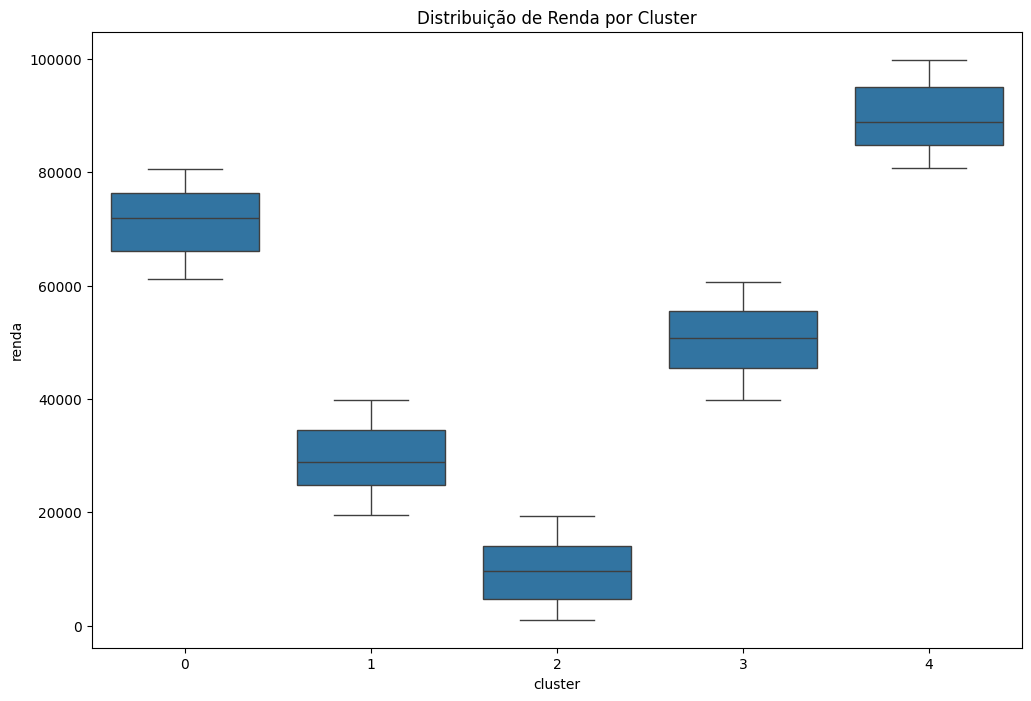


Resultados ANOVA:
idade: F-statistic=0.8539513219702543, p-value=0.4911707373906783
renda: F-statistic=5821.150445137467, p-value=0.0
educacao: F-statistic=1.6472188983393459, p-value=0.16020251317703568
dependentes: F-statistic=0.3094054708627589, p-value=0.8717875568206618
experiencia: F-statistic=1.0816175150994964, p-value=0.3642497973512982

Resultados Qui-quadrado:
regiao: Chi2-statistic=13.6764084745479, p-value=0.6228066603465059
nacionalidade: Chi2-statistic=1.1419437305043756, p-value=0.8875615437612591
naturalidade: Chi2-statistic=96.75517922277524, p-value=0.6801008397275515
ocupacao: Chi2-statistic=24.441550166507426, p-value=0.08029435628924587
moradia: Chi2-statistic=23.876715396801337, p-value=0.09223196047759497


In [30]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, chi2_contingency

# Configuração do ambiente Spark
spark = SparkSession.builder.appName("KMeansClustering").getOrCreate()

# Dataset sintético com características adicionais
np.random.seed(42)
data = {
    'idade': np.random.randint(18, 65, 1000),
    'renda': np.random.randint(1000, 100000, 1000),
    'educacao': np.random.randint(0, 20, 1000),
    'dependentes': np.random.randint(0, 5, 1000),
    'experiencia': np.random.randint(0, 40, 1000),
    'regiao': np.random.randint(0, 5, 1000),
    'nacionalidade': np.random.randint(0, 2, 1000),
    'naturalidade': np.random.randint(0, 27, 1000),
    'ocupacao': np.random.randint(0, 5, 1000),
    'moradia': np.random.randint(0, 5, 1000)
}
df = pd.DataFrame(data)
df_spark = spark.createDataFrame(df)

# Clusterização com K-Means
k = 5  # Número de clusters
assembler = VectorAssembler(inputCols=['idade', 'renda', 'educacao', 'dependentes', 'experiencia',
                                       'regiao', 'nacionalidade', 'naturalidade', 'ocupacao', 'moradia'],
                            outputCol='features')
df_assembled = assembler.transform(df_spark)
kmeans = KMeans(k=k, seed=42)
model = kmeans.fit(df_assembled)
clusters = model.transform(df_assembled)
# Remove the incorrect line calling predict again
# clusters = clusters.select("*", model.predict(df_assembled).alias("cluster"))
clusters = clusters.withColumnRenamed("prediction", "cluster") # Rename 'prediction' to 'cluster'
clusters_pandas = clusters.toPandas()

# Análise de Correlação entre Características e Clusters

# Calculando a média das características numéricas por cluster
numerical_features = ['idade', 'renda', 'educacao', 'dependentes', 'experiencia',
                       'regiao', 'nacionalidade', 'naturalidade', 'ocupacao', 'moradia']
means_by_cluster = clusters_pandas.groupby('cluster')[numerical_features].mean()
print("\nMédias das características por cluster:\n", means_by_cluster)


# Visualizando a distribuição de algumas características numéricas por cluster
plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster', y='renda', data=clusters_pandas)
plt.title('Distribuição de Renda por Cluster')
plt.show()

# Teste ANOVA para variáveis numéricas
anova_results = {}
numerical_features = ['idade', 'renda', 'educacao', 'dependentes', 'experiencia']
for feature in numerical_features:
    grouped_data = [clusters_pandas[clusters_pandas['cluster'] == cluster][feature] for cluster in range(k)]
    anova_results[feature] = f_oneway(*grouped_data)

print("\nResultados ANOVA:")
for feature, result in anova_results.items():
    print(f"{feature}: F-statistic={result.statistic}, p-value={result.pvalue}")

# Teste Qui-quadrado para variáveis categóricas
categorical_features = ['regiao', 'nacionalidade', 'naturalidade', 'ocupacao', 'moradia']
chi2_results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(clusters_pandas['cluster'], clusters_pandas[feature])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[feature] = (chi2, p)

print("\nResultados Qui-quadrado:")
for feature, (chi2, p) in chi2_results.items():
    print(f"{feature}: Chi2-statistic={chi2}, p-value={p}")

# Fechando a sessão do Spark
spark.stop()

Com base nos resultados apresentados, analisamos a correlação entre as características e os clusters formados:

### Análise das Médias das Características por Cluster

1. **Idade**: A média de idade é relativamente consistente entre os clusters, variando entre 40 e 42 anos. Isso sugere que a idade não é um fator fortemente discriminante na formação dos clusters.

2. **Renda**: A renda média varia significativamente entre os clusters, com um cluster (cluster 4) tendo uma média de renda substancialmente mais alta (cerca de 89.968) e outro (cluster 2) com uma média de renda muito mais baixa (cerca de 9.731). Isso indica que a renda é uma característica chave na diferenciação dos clusters.

3. **Educação**: As médias de anos de educação também são bastante semelhantes entre os clusters, variando de 8.53 a 10.04 anos. Isso sugere que a educação não tem um impacto forte na formação dos clusters.

4. **Dependentes e Experiência**: Ambas as características mostram pouca variação nas médias entre os clusters, indicando que não são características determinantes para a separação em clusters.

5. **Outras Características (Região, Nacionalidade, Naturalidade, Ocupação, Moradia)**: As médias dessas características são também bastante consistentes entre os clusters, sugerindo que nenhuma delas isoladamente tem um impacto significativo na formação dos clusters.

### Resultados ANOVA

- **Renda**: O teste ANOVA para renda resulta em um F-statistic muito alto e um p-valor de 0.0, indicando uma diferença estatisticamente significativa entre as médias de renda dos clusters. Isso corrobora a observação de que a renda é uma característica fundamental na diferenciação dos clusters.

- **Outras Características Numéricas (Idade, Educação, Dependentes, Experiência)**: Os p-valores são todos acima de 0.05, indicando que não há diferenças estatisticamente significativas nas médias dessas características entre os clusters.

### Resultados Qui-quadrado

- **Região, Nacionalidade, Naturalidade, Ocupação, Moradia**: Todos os p-valores estão acima de 0.05, sugerindo que não há associação estatisticamente significativa entre essas variáveis categóricas e a formação dos clusters. Embora as estatísticas para ocupação e moradia sejam relativamente altas, os p-valores indicam que as diferenças não são significativas no nível tradicional de 0.05.

### Conclusões

Com base nos resultados, podemos concluir que:

- **Renda é a característica mais importante** na formação dos clusters, com diferenças claras entre os grupos.

- **Idade, educação, dependentes, e experiência** não são características que contribuem significativamente para a distinção entre os clusters.

- **Características categóricas** como região, nacionalidade, naturalidade, ocupação, e tipo de moradia também não mostram correlações fortes com os clusters formados, embora ocupação e moradia tenham uma ligeira tendência a influenciar a formação dos clusters, conforme sugerido pelas estatísticas qui-quadrado.

Esses insights sugerem que, ao considerar estratégias de segmentação ou personalização, a renda deve ser um foco central, enquanto outras características podem não precisar de tanta atenção a menos que sejam combinadas de maneira que revele padrões mais complexos.